In [1]:
import numpy as np

In [3]:
# load data
exp = np.load("I_q_IPA_exp.npy")
model = np.load("I_q_IPA_model.npy")
print(exp.shape, model.shape)

(256, 2) (48, 2)


In [31]:
scattering_v_exp = exp[:,0]
scattering_v_model = model[:,0]
scattering_s_exp = exp[:,1]
scattering_s_model = model[:,1]/10000
print(scattering_v_exp.shape, scattering_v_model.shape, scattering_s_exp.shape, scattering_s_model.shape)

(256,) (48,) (256,) (48,)


In [95]:
non_nan_indices = np.where(~np.isnan(scattering_s_exp)) 
scattering_v_exp = scattering_v_exp[non_nan_indices]
scattering_s_exp = scattering_s_exp[non_nan_indices]

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'experiment')

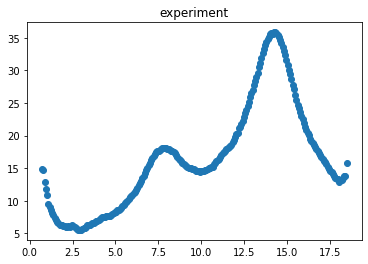

In [96]:
plt.scatter(scattering_v_exp, scattering_s_exp)
plt.title('experiment')

Text(0.5, 1.0, 'model')

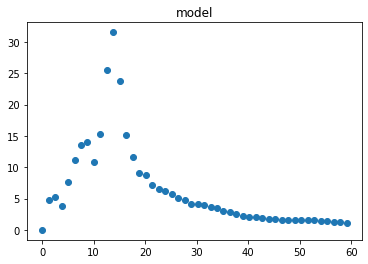

In [97]:
plt.scatter(scattering_v_model, scattering_s_model)
plt.title("model")

In [ ]:
import scipy as sp

(244,) (244,)


Text(0.5, 1.0, 'model')

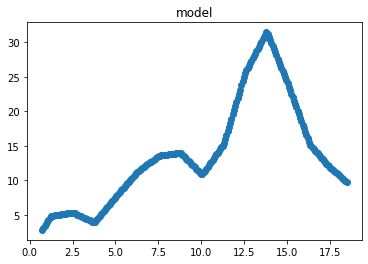

In [99]:
f = sp.interpolate.interp1d(scattering_v_model, scattering_s_model)
scattering_s_model_new = f(scattering_v_exp)

print(scattering_v_exp.shape, scattering_s_model_new.shape)

plt.scatter(scattering_v_exp, scattering_s_model_new)
plt.title("model")

In [85]:
def objective(scaling_factor):
    scaled_model = scaling_factor * scattering_s_model_new
    return np.sum((scaled_model - scattering_s_exp)**2)

In [100]:
scattering_s_exp.shape

(244,)

In [28]:
from scipy.optimize import minimize_scalar

In [110]:
result = minimize_scalar(objective)
print(result)

     fun: 1576.402546644788
    nfev: 9
     nit: 5
 success: True
       x: 1.155137203941832


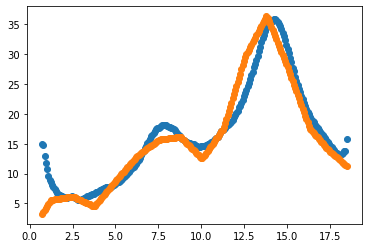

In [111]:
scaled_model = result.x * scattering_s_model_new
plt.scatter(scattering_v_exp, scattering_s_exp)
plt.scatter(scattering_v_exp, scaled_model)
plt.show()

In [112]:
from scipy.optimize import minimize
result = minimize(objective, x0=np.ones(244), tol=1e-6)
print(result.x)

[5.30013326 4.77599387 3.82834054 3.22503674 2.75767437 2.26499711
 2.00121789 1.7975198  1.66768836 1.58855044 1.4979687  1.41998112
 1.36965928 1.31430054 1.26211153 1.24643742 1.23065064 1.20069345
 1.1938074  1.15333262 1.15306734 1.17638053 1.14768823 1.15115318
 1.17796225 1.15578972 1.14187334 1.15333151 1.12920169 1.12184305
 1.14644017 1.16621666 1.22402116 1.28081705 1.30536328 1.36637991
 1.43930948 1.46224193 1.51874108 1.55922113 1.65808381 1.68879203
 1.69073797 1.64350892 1.58159809 1.53284421 1.49943984 1.44241634
 1.41405962 1.37871972 1.32481184 1.28927973 1.24965251 1.19831624
 1.16361908 1.14012945 1.12132107 1.10796447 1.09790513 1.0831936
 1.08610574 1.06125941 1.04923522 1.0471239  1.04677659 1.04600078
 1.04728455 1.04267587 1.04519814 1.04701114 1.05315048 1.05175649
 1.05004405 1.0489414  1.05257782 1.05836247 1.06649883 1.08678724
 1.10160508 1.12424284 1.14397119 1.16370714 1.18543504 1.20470198
 1.22518032 1.24648756 1.25690565 1.27644663 1.28429954 1.29898

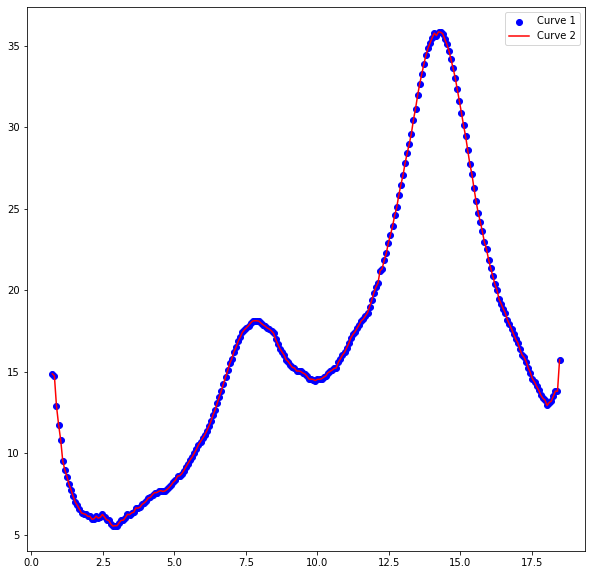

In [119]:
scaled_model = result.x * scattering_s_model_new
plt.figure(figsize=(10, 10))
plt.scatter(scattering_v_exp, scattering_s_exp, label='Curve 1', color='blue')
plt.plot(scattering_v_exp, scaled_model, label='Curve 2', color='red')
plt.legend()
plt.show()